# Applied Deep Learning - a use case based approach to understand deep neural networks

### Umberto Michelucci

Buy the book: https://www.apress.com/us/book/9781484237892

(C) Umberto Michelucci 2018-2019 - umberto.michelucci@gmail.com 

github repository: https://github.com/Apress/applied-deep-learning

## Matplotlib standard parameters

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import tensorflow as tf

from scipy.optimize import curve_fit

# Generic matplotlib parameters for plots and figures
mpl.rcParams['figure.figsize'] = [8,5]
font = {'size'   : 16}
mpl.rc('font', **font)

In [8]:
def func_0(p, a): 
    return a


def func_2(p, a, b, c): 
    return a+b*p + c*p**2

def func_3(p, a, b, c,d): 
    return a+b*p + c*p**2+d*p**3

def func_5(p, a, b, c,d,e,f): 
    return a+b*p + c*p**2+d*p**3+e*p**4+f*p**5

def func_14(p, a,b,c,d,e,f,g,h, i,j,k,l,m,n,o):
    return a+b*p + c*p**2+d*p**3+e*p**4 + f*p**5 + g*p**6 + h*p**7+i*p**8 + j*p**9+k*p**10+l*p**11 + m*p**12 + n*p**13 + o*p**14

def func_21(p, a,b,c,d,e,f,g,h, i,j,k,l,m,n,o, q, r, s, t, u, v, x):
    return a+b*p + c*p**2+d*p**3+e*p**4 + f*p**5 + g*p**6 + h*p**7+i*p**8 + j*p**9+k*p**10+l*p**11 + m*p**12 + n*p**13 + o*p**14+q*p**15+r*p**16+s*p**17+t*p**18+u*p**19+v*p**20+x*p**21
        

def func_1(p, a, b):
    return a+b*p

In [9]:
x = np.arange(-5.0, 5.0, 0.1, dtype = np.float64) 

y = func_2(x, 1,2,3)+18.0*np.random.normal(0, 1, size=len(x))

In [10]:
popt, pcov = curve_fit(func_2, x, y)

In [11]:
print(popt)

[1.9763199  2.52612408 2.80791499]


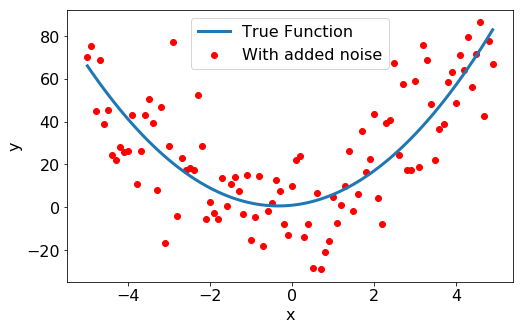

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, color = 'red', label = 'With added noise')
ax.plot(x, func_2(x, 1,2,3), lw = 3,  label = 'True Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.legend()

# pol 1st order

In [13]:
popt, pcov = curve_fit(func_1, x, y)
print(popt)

[25.36625176  2.24533261]


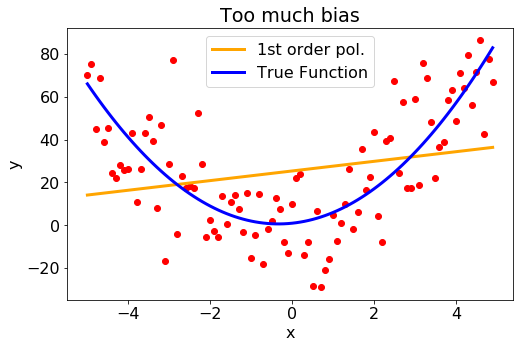

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, color = 'red')
ax.plot(x, func_1(x, popt[0], popt[1]),  lw=3, color = 'orange', label = '1st order pol.')
ax.plot(x, func_2(x, 1,2,3), lw = 3, color ='blue', label = 'True Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Too much bias')
plt.legend()

# pol 2nd order

In [15]:
popt, pcov = curve_fit(func_2, x, y)
print(popt)

[1.9763199  2.52612408 2.80791499]


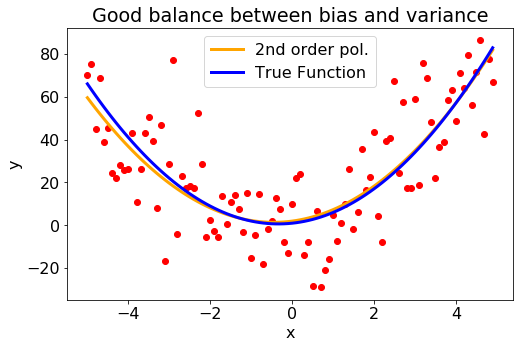

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, color = 'red')
ax.plot(x, func_2(x, *popt),  lw=3, color ='orange', label = '2nd order pol.')
ax.plot(x, func_2(x, 1,2,3), lw = 3, color ='blue', label = 'True Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Good balance between bias and variance')
plt.legend()

# pol 21th order

In [17]:
popt, pcov = curve_fit(func_21, x, y)
print(popt)

[ 2.88270550e+00 -1.05163013e+01 -3.14862513e+01 -2.28778080e+00
  3.71424558e+01  1.37572941e+01 -1.60719250e+01 -7.64118487e+00
  3.75480449e+00  1.93459522e+00 -5.23938588e-01 -2.75570153e-01
  4.55857149e-02  2.38296859e-02 -2.49385570e-03 -1.27786538e-03
  8.33814937e-05  4.15530929e-05 -1.55665386e-06 -7.51059961e-07
  1.24338018e-08  5.79366010e-09]


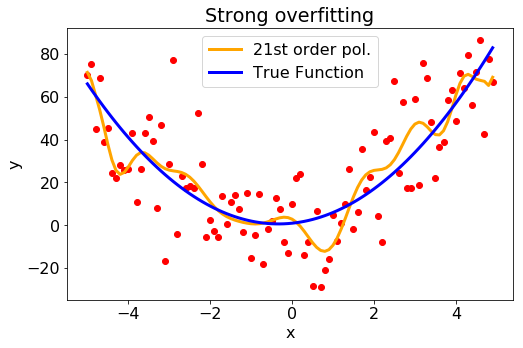

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x,y, color = 'red')
ax.plot(x, func_21(x, *popt),  lw=3,color ='orange', label = '21st order pol.')
ax.plot(x, func_2(x, 1,2,3), lw = 3, color ='blue', label = 'True Function')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.title('Strong overfitting')
plt.legend()

# Comparison of the blue line

In [26]:
yy = []
poptl = []
for i in range (0,10):
    np.random.seed(seed = i)
    yy.append(func_2(x, 1,2,3)+18.0*np.random.normal(0, 1, size=len(x)))
    popt, _ = curve_fit(func_21, x, yy[i])
    poptl.append(popt)

Text(0,0.5,'y')

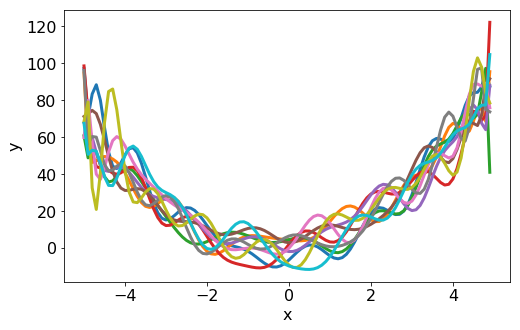

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(0,10):
    ax.plot(x, func_21(x, *poptl[i]),  lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [28]:
yy = []
poptl = []
for i in range (0,10):
    np.random.seed(seed = i)
    yy.append(func_2(x, 1,2,3)+18.0*np.random.normal(0, 1, size=len(x)))
    popt, _ = curve_fit(func_1, x, yy[i])
    poptl.append(popt)

Text(0,0.5,'y')

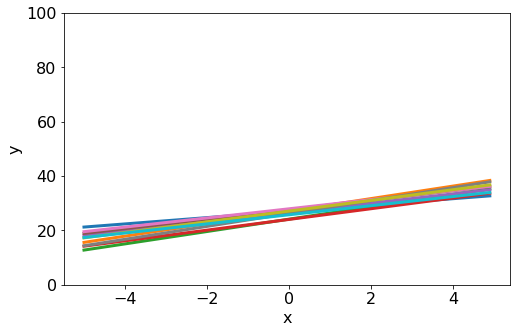

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ylim(0,100)
for i in range(0,10):
    ax.plot(x, func_1(x, *poptl[i]),  lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Bias - Variance tradeoff

In [30]:
x = np.arange(-5.0, 5.0, 0.25, dtype = np.float64) 

y = func_5(x, 1,2,3,4,5,6)/1.0+2000.0*np.random.normal(0, 1, size=len(x))
ytest = func_5(x, 1,2,3,4,5,6)/1.0+2000.0*np.random.normal(0, 1, size=len(x))

Text(0,0.5,'y')

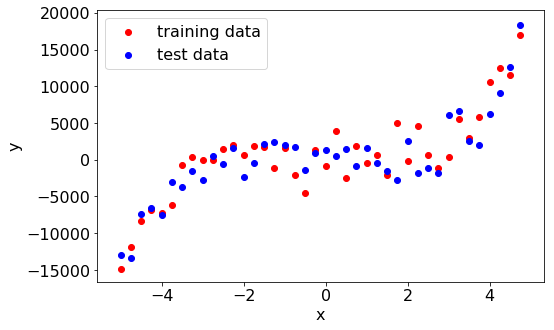

In [36]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x[:,],y[:,], color = 'red', label = 'training data')
ax.scatter(x[:,],ytest[:,], color = 'blue', label = 'test data')
ax.legend();
ax.set_xlabel('x')
ax.set_ylabel('y')


Now let's calculate the bias and the variance using ploynomials of increasing complexity (read: order). We will consider oreder 0 to 10, meaning a constant to a 9th order polynomialy (read: where the highest order is $x^9$).

In [38]:
kmax = 10
bias = np.empty(kmax)
variance = np.empty(kmax)

def make_func(N):
    def func(x, *p): 
        res = np.zeros(len(x))
        for i in range (0,N+1):
            res = res + p[i]*x**i
        return res
    return func

for K in range (0,kmax):
    func = make_func(K)
    popt, _ = curve_fit(make_func(K), x, y, p0=[1.0]*(K+1))
    bias[K] = np.mean((func(x, *popt)-y)**2)
    variance[K] = np.var((func(x, *popt)))

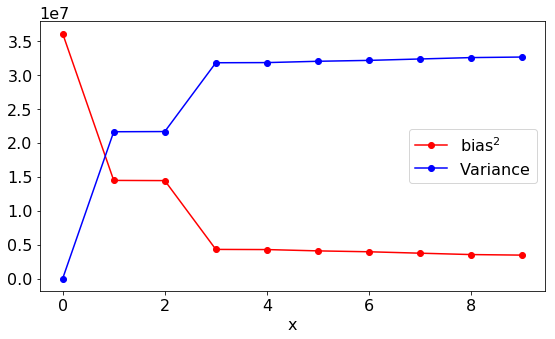

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(range(0,kmax),bias, color = 'red',  label = r'bias$^2$', marker = 'o')
ax.plot(range(0,kmax),variance, color = 'blue',  label = 'Variance', marker = 'o')
ax.set_xlabel('x')
plt.legend()
plt.tight_layout()

# Neural network for regression

In [41]:
xx = x.reshape(1,len(x))
yy = y.reshape(1,len(y))/1000.0+20.0
yytest = ytest.reshape(1,len(ytest))/1000.0+20.0

Let's try something crazy: a network with one layer and 1500 neurons in the layer. What do you expect?

In [84]:
tf.reset_default_graph()


n1 = 500

cost_history = np.empty(shape=[1], dtype = float)

learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [1, None])
Y = tf.placeholder(tf.float32, [1, None])
W1 = tf.Variable(tf.random_normal([n1, 1], stddev=1))/100.0
b1 = tf.Variable(tf.ones([n1,1]))/100.0
W2 = tf.Variable(tf.random_normal([1,n1], stddev=1))/100.0
b2 = tf.Variable(tf.ones(1))/100.0



# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1,X)+b1)
y_ = tf.nn.relu(tf.matmul(W2,Z1)+b2)


cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

optimizer2 = tf.train.AdamOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [85]:
sess = tf.Session()
sess.run(init)

training_epochs = 50000

cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: xx, Y: yy, learning_rate: 0.05})
    cost_ = sess.run(cost, feed_dict={ X:xx, Y: yy, learning_rate: 0.05})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 5000 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 459.3043
Reached epoch 5000 cost J = 391.34418
Reached epoch 10000 cost J = 176.33224
Reached epoch 15000 cost J = 80.45919
Reached epoch 20000 cost J = 62.597546
Reached epoch 25000 cost J = 54.56562
Reached epoch 30000 cost J = 46.86068
Reached epoch 35000 cost J = 39.338806
Reached epoch 40000 cost J = 32.557175
Reached epoch 45000 cost J = 27.664154
Reached epoch 50000 cost J = 25.060059


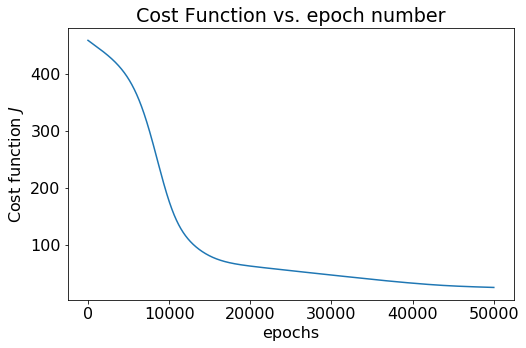

In [86]:
plt.figure()
plt.title("Cost Function vs. epoch number")
plt.xlabel("epochs")
plt.ylabel("Cost function $J$")
plt.plot(range(len(cost_history)), cost_history)

MSE: 25.0601


Text(0,0.5,'y')

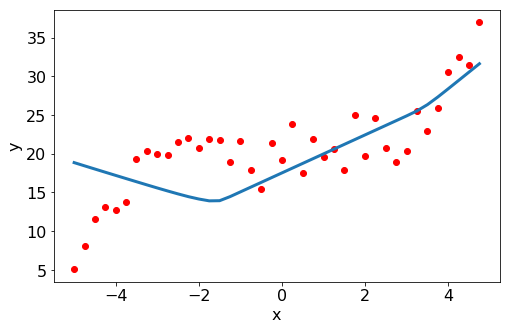

In [88]:
pred_y = sess.run(y_, feed_dict={ X:xx, learning_rate: 0.005})
mse = tf.reduce_mean(tf.square(pred_y - yy))
print("MSE: %.4f" % sess.run(mse))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xx[0,:],yy, color = 'red')
ax.plot(xx[0,:], pred_y.flatten(),  lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

In [80]:
sess.close()

### Optional - Check a more efficient optimizer

Try to run the following code this time. This is just **to give you a flavour** of what we will be able to do in the next weeks. This time we use a different, and more efficient, optimizer

In [89]:
sess = tf.Session()
sess.run(init)

training_epochs = 50000

cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer2, feed_dict = {X: xx, Y: yy, learning_rate: 0.05})
    cost_ = sess.run(cost, feed_dict={ X:xx, Y: yy, learning_rate: 0.05})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 5000 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 458.47012
Reached epoch 5000 cost J = 6.545417
Reached epoch 10000 cost J = 4.615087
Reached epoch 15000 cost J = 4.4904966
Reached epoch 20000 cost J = 4.4076414
Reached epoch 25000 cost J = 4.293413
Reached epoch 30000 cost J = 4.2181816
Reached epoch 35000 cost J = 4.148961
Reached epoch 40000 cost J = 4.084913
Reached epoch 45000 cost J = 4.026259
Reached epoch 50000 cost J = 3.9727561


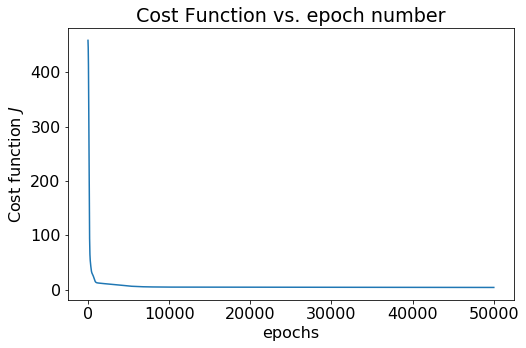

In [90]:
plt.figure()
plt.title("Cost Function vs. epoch number")
plt.xlabel("epochs")
plt.ylabel("Cost function $J$")
plt.plot(range(len(cost_history)), cost_history)

MSE: 3.9728


Text(0,0.5,'y')

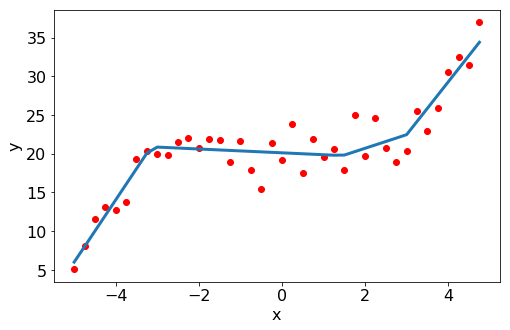

In [91]:
pred_y = sess.run(y_, feed_dict={ X:xx, learning_rate: 0.005})
mse = tf.reduce_mean(tf.square(pred_y - yy))
print("MSE: %.4f" % sess.run(mse))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xx[0,:],yy, color = 'red')
ax.plot(xx[0,:], pred_y.flatten(),  lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Exercise 1: easy

Try different ways of initializing the weights (both ```W1``` and ```W2```) keeping the number of neurons constant. For example try

    W1 = tf.Variable(tf.random_normal([n1, 1], stddev=1))/100.0
    W1 = tf.Variable(tf.ones([n1, 1]))/10.0
    W1 = tf.Variable(tf.ones([n1, 1]))/100.0
    
do ```b1``` and ```b2``` plays the same role? Is their initialisation important?

**Use the following code**

In [ ]:
tf.reset_default_graph()


n1 = 500

cost_history = np.empty(shape=[1], dtype = float)

learning_rate = tf.placeholder(tf.float32, shape=())

X = tf.placeholder(tf.float32, [1, None])
Y = tf.placeholder(tf.float32, [1, None])
W1 = tf.Variable(tf.random_normal([n1, 1], stddev=1))/100.0
b1 = tf.Variable(tf.ones([n1,1]))/10.0
W2 = tf.Variable(tf.random_normal([1,n1], stddev=1))/100.0
b2 = tf.Variable(tf.ones(1))/100.0



# Let's build our network...
Z1 = tf.nn.relu(tf.matmul(W1,X)+b1)
y_ = tf.nn.relu(tf.matmul(W2,Z1)+b2)


cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [ ]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 100000

cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: xx, Y: yy, learning_rate: 0.05})
    cost_ = sess.run(cost, feed_dict={ X:xx, Y: yy, learning_rate: 0.05})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 5000 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

# Exercise 2 - difficulty medium

Build a network with two or three layers and try to do regression again on the same dataset.
In particular try

- Try with different number of neurons in the two layers
- Try with 2 or 3 layers

Typically when using more layers, the number of neurons you need is much lower than when you have one single layer networks.

In [122]:
n_dim = 1
tf.reset_default_graph()

# Number of neurons in the layers
n1 = 5 # Number of neurons in layer 1
n2 = 5 # Number of neurons in layer 2 
n3 = 5
n4 = 1 # Output neuron

cost_history = np.empty(shape=[0], dtype = float)
learning_rate = tf.placeholder(tf.float32, shape=())

tf.set_random_seed(5)

stddev_f = 0.1

X = tf.placeholder(tf.float32, [n_dim, None])
Y = tf.placeholder(tf.float32, [1, None])
W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev = stddev_f)) 
b1 = tf.Variable(tf.constant(0.0, shape = [n1,1]) )
W2 = tf.Variable(tf.truncated_normal([n2, n1], stddev = stddev_f))
b2 = tf.Variable(tf.constant(0.0, shape = [n2,1])) 
W3 = tf.Variable(tf.truncated_normal([n3,n2], stddev = stddev_f)) 
b3 = tf.Variable(tf.constant(0.0, shape = [n3,1]))
W4 = tf.Variable(tf.truncated_normal([n4,n3], stddev = stddev_f))  
b4 = tf.Variable(tf.constant(0.0, shape = [n4,1]))
                 
# Let's build our network...
Z1 = tf.nn.sigmoid(tf.matmul(W1, X) + b1) # n1 x n_dim * n_dim x n_obs = n1 x n_obs
Z2 = tf.nn.sigmoid(tf.matmul(W2, Z1) + b2) # n2 x n1 * n1 * n_obs = n2 x n_obs
Z3 = tf.nn.sigmoid(tf.matmul(W3, Z2) + b3)
Z4 = tf.matmul(W4, Z3) + b4
y_ = tf.nn.relu(Z4) # (1 x None)

cost = tf.reduce_mean(tf.square(y_-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

In [123]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

training_epochs = 50000

cost_history = []
for epoch in range(training_epochs+1):

    sess.run(optimizer, feed_dict = {X: xx, Y: yy, learning_rate: 0.005})
    cost_ = sess.run(cost, feed_dict={ X:xx, Y: yy, learning_rate: 0.005})
    cost_history = np.append(cost_history, cost_)

    if (epoch % 5000 == 0):
        print("Reached epoch",epoch,"cost J =", cost_)

Reached epoch 0 cost J = 436.19345
Reached epoch 5000 cost J = 7.913996
Reached epoch 10000 cost J = 4.0717216
Reached epoch 15000 cost J = 4.009263
Reached epoch 20000 cost J = 3.9708886
Reached epoch 25000 cost J = 3.942669
Reached epoch 30000 cost J = 3.9189973
Reached epoch 35000 cost J = 3.8972878
Reached epoch 40000 cost J = 3.874902
Reached epoch 45000 cost J = 3.830841
Reached epoch 50000 cost J = 3.635629


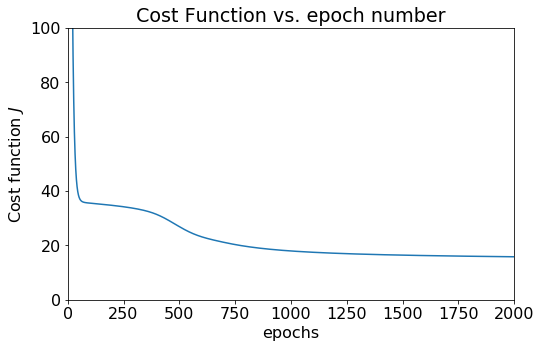

In [127]:
plt.figure()
plt.title("Cost Function vs. epoch number")
plt.xlabel("epochs")
plt.ylabel("Cost function $J$")
plt.xlim(0,2000)
plt.ylim(0,100)
plt.plot(range(len(cost_history)), cost_history)

MSE: 3.6356


Text(0,0.5,'y')

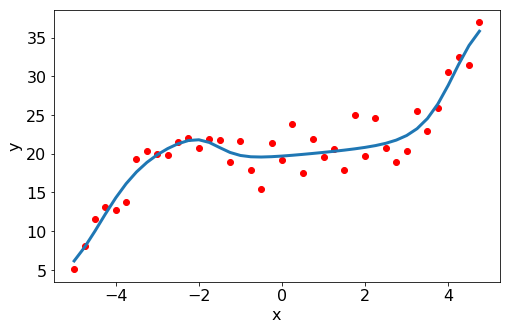

In [125]:
pred_y = sess.run(y_, feed_dict={ X:xx, learning_rate: 0.005})
mse = tf.reduce_mean(tf.square(pred_y - yy))
print("MSE: %.4f" % sess.run(mse))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(xx[0,:],yy, color = 'red')
ax.plot(xx[0,:], pred_y.flatten(),  lw=3)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Exercise 3 - Weight initialisation - difficulty: medium

Take the previous code, the network with the three layers, and try different weight initialisations. For example

    W1 = tf.Variable(tf.ones([n1, n_dim]))
    W1 = tf.Variable(tf.ones([n1, n_dim])) / 10.0 # Try different values here
    W1 = tf.Variable(tf.truncated_normal([n1, n_dim], stddev = stddev_f)) # Try different values of stddev_f

# Exercise 4 - Different network architecture

Try the previous code and check what happens increasing the number of neurons in each layers or increasing the number of layers.